# Projekt 1 Feature engineering + EDA
## Opis projektu:
Ten projekt ma na celu przeprowadzenie procesu Feature Engineering i Exploratory Data Analysis na wybranym zestawie danych z platformy dane.gov.pl. Pierwsze etapy pipeline'u ML zostaną wykonane w celu zrozumienia i przygotowania danych do dalszej analizy. Zostanie również wybrana zmienna TARGET, która będzie używana w uczeniu nadzorowanym oraz podzbiór zmiennych FEATURES, które mogą być użyte do wyznaczenia zmiennej TARGET. Cały proces będzie wykorzystywał bibliotekę Seaborn do wizualizacji wyników.

### Projekt wynonany przez: 
Michała Janowskiego

### Zapoznanie się ze stroną dane.gov.pl
Jest to portal udostępniający różnego rodzaju dane publiczne pochodzące z różnych instytucji.

Dane prezentowane na stronie głownej można wyszukać przez wyszukiwarkę danych,<br>
Dane można wybrać pod względem kategorii, jak i dostawcę danych. 
- Dane są dostępne do pobrania w formacie csv, doc, docx, geojson, html, jpeg, json.
- Dane są udostępniane przez 288 dostawców, 
- Liczba danych to 31107,
- Liczba API (potrzebnych do pobrania danych) to 485

Każde z API działa w nieco inny sposób i umożliwia dostęp do innych zestawów danych.<br><br>
Na stronie znajduje się filtr, który ułatwia wyszukiwanie danych o wysokiej jakości.<br>
Portal udostępnia różne narzędzia, takie jak:
- opisy danych, 
- dokumentację API,
- pliki metadanych,<br>

Pomagają one w szybkim sprawdzeniu jakości danych.<br><br>
Dane można pobrać bezpłatnie ze strony.

## Pierwsze etapy pipeline'u ML

In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel('zgony_po_szczep.xlsx')

Dane o zgonach z powodu COVID-19 z uwzględnieniem zaszczepienia przeciw COVID-19. Dane na dzień 2023.03.23

In [2]:
data

,data_rap_zgonu,teryt_woj,teryt_pow,plec,kat_wiek,czy_wspolistniejace,producent,dawka_ost,odl_szczep_zgn,liczba_zaraportowanych_zgonow
0,2021-01-02,4.0,407.0,K,65-74,1,NaN,NaN,NaN,1
1,2021-01-02,4.0,407.0,K,85-94,1,NaN,NaN,NaN,1
2,2021-01-02,4.0,407.0,M,65-74,1,NaN,NaN,NaN,1
3,2021-01-02,4.0,415.0,M,65-74,1,NaN,NaN,NaN,1
4,2021-01-02,4.0,415.0,M,75-84,1,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
88917,2023-03-23,20.0,2061.0,K,85-94,1,Pfizer,pelna_dawka,>360,1
88918,2023-03-23,22.0,2209.0,K,75-84,0,NaN,NaN,NaN,1
88919,2023-03-23,24.0,2461.0,M,85-94,0,NaN,NaN,NaN,1
88920,2023-03-23,26.0,2610.0,M,65-74,0,Pfizer,pelna_dawka,>360,1


## Punkt 2
W tym zbiorze danych można zastosować uczenie nadzorowane w celu predykcji liczby zgonów z powodu COVID-19 w zależności od innych cech, takich jak data raportu, województwo, płeć, kategoria wiekowa, czy występowanie chorób współistniejących, producent szczepionki, dawka szczepienia itp. <br>
W tym przypadku można wykorzystać uczenie nadzorowane.

## Punkt 3 i 4
### Zmiana formatu kolumny z datami.
Kolumna data_rap_zgonu zawiera daty w formacie tekstowym, które należy przekształcić na format daty, aby następnie móc zmienić date na format roku i miesiąca, co pozwoli uzyskać lepsze informacje dla danych.

In [3]:
data['data_rap_zgonu'] = pd.to_datetime(data['data_rap_zgonu'])
data['data_rap_zgonu'] = data['data_rap_zgonu'].dt.strftime('%Y-%m')

### Usunięcie niepotrzenych kolumn
Kolumna teryt_woj zawiera w niektórych wierszach wartości NaN, oraz reprezentuje wielkość powiatu, a nie województwa, więc nie przyczynia się do analizy i może zostać usunięta.

In [4]:
data = data.drop(columns=['teryt_pow'])

### Przekształcenie wartości kolumn
Dla kolumny teryt_woj - zamiana wartości skrótowych na pełne nazwy województwa<br>
Dla kolumny plec - zamiana wartości skrótowych na pełne nazwy angielskie<br>
Dla kolumny kat_wiek (zawiera zakresy wiekowe) - przekształcenie wartości BD na wartości NaN<br>
Dla kolumny czy_wspolistniejace	- zamiana wartości zero jedynkowych na True i False<br>
Dla kolumny odl_szczep_zgn - zamiana wartości, aby dane były spójne

In [5]:
print('Wartości unikalne kolumny teryt_woj')
print(np.unique(data['teryt_woj']))
data['teryt_woj'] = data['teryt_woj'].astype(str)
data['teryt_woj'] = data['teryt_woj'].replace({'10.0': 'łódzkie', '12.0': 'małopolskie', '14.0': 'mazowieckie',\
                                               '16.0': 'opolskie', '18.0': 'podkarpackie', '2.0': 'dolnośląskie', \
                                               '20.0': 'podlaskie', '22.0' : 'pomorskie', '24.0': 'śląskie', \
                                               '26.0': 'świętokrzyskie', '28.0': 'warmińsko-mazurskie', \
                                               '30.0': 'wielkopolskie', '32.0': 'zachodniopomorskie', \
                                               '4.0': 'kujawsko-pomorskie', '6.0': 'lubelskie', '8.0': 'lubuskie', \
                                               'nan': 'unknown'})
print('\nWartości unikalne kolumny teryt_woj po zmianie')
print(np.unique(data['teryt_woj']))
print('------------------------------------------------')

print('\nWartości unikalne kolumny płeć')
print(np.unique(data['plec']))
data['plec'] = data['plec'].replace({'K': 'Female', 'M': 'Male', 'nieznana' : 'unknown'})
print('\nWartości unikalne kolumny płeć po zmianie')
print(np.unique(data['plec']))
print('\n------------------------------------------------')

print('\nWartości unikalne kolumny kat_wiek')
print(np.unique(data['kat_wiek']))
data['kat_wiek'] = data['kat_wiek'].replace({'BD' : np.NaN})
data['kat_wiek'] = data['kat_wiek'].astype(str)
print('Wartości unikalne kolumny czy_wspolistniejace po zmianie')
print(np.unique(data['kat_wiek']))
print('\n------------------------------------------------')

print('\nWartości unikalne kolumny czy_wspolistniejace')
print(np.unique(data['czy_wspolistniejace']))
data['czy_wspolistniejace'] = data['czy_wspolistniejace'].replace({0: False, 1: True})
print('Wartości unikalne kolumny czy_wspolistniejace po zmianie')
print(np.unique(data['czy_wspolistniejace']))
print('\n------------------------------------------------')

print('\nWartości unikalne kolumny producent')
data['producent'] = data['producent'].astype(str)
print(np.unique(data['producent']))
data['producent'] = data['producent'].replace({'brak danych': np.NaN})
data['producent'] = data['producent'].astype(str)
print('\nWartości unikalne kolumny producent po zmianie')
print(np.unique(data['producent']))
print('\n------------------------------------------------')

print('\nWartości unikalne kolumny odl_szczep_zgn')
data['odl_szczep_zgn'] = data['odl_szczep_zgn'].astype(str)
print(np.unique(data['odl_szczep_zgn']))
data['odl_szczep_zgn'] = data['odl_szczep_zgn'].replace({'0-90': '0-90 days','90-180': '91-180 days',\
                                                         '180-270': '181-270 days','270-360': '271-360 days',\
                                                         '>360': 'more than 360 days','nan': 'unknown'})
print('\nWartości unikalne kolumny odl_szczep_zgn po zmianie')
print(np.unique(data['odl_szczep_zgn']))

Wartości unikalne kolumny teryt_woj
[ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. nan]

Wartości unikalne kolumny teryt_woj po zmianie
['dolnośląskie' 'kujawsko-pomorskie' 'lubelskie' 'lubuskie' 'mazowieckie'
 'małopolskie' 'opolskie' 'podkarpackie' 'podlaskie' 'pomorskie' 'unknown'
 'warmińsko-mazurskie' 'wielkopolskie' 'zachodniopomorskie' 'łódzkie'
 'śląskie' 'świętokrzyskie']
------------------------------------------------

Wartości unikalne kolumny płeć
['K' 'M' 'nieznana']

Wartości unikalne kolumny płeć po zmianie
['Female' 'Male' 'unknown']

------------------------------------------------

Wartości unikalne kolumny kat_wiek
['0-18' '19-24' '25-34' '35-44' '45-54' '55-64' '65-74' '75-84' '85-94'
 '95+' 'BD']
Wartości unikalne kolumny czy_wspolistniejace po zmianie
['0-18' '19-24' '25-34' '35-44' '45-54' '55-64' '65-74' '75-84' '85-94'
 '95+' 'nan']

------------------------------------------------

Wartości unikalne kolumny czy_wspolistniejace
[0 1]
Wartości

Dla kolumny dawka_ost - usunięcie wierszy, które zawierają wartości NaN, ponieważ wartości NaN w tej kolumnie oznaczają brak szczepienia, a analiza wykonywana jest w oparciu o osoby zaszczepione.

In [6]:
data.dropna(subset=['dawka_ost'], inplace=True)
data = data.reset_index(drop=True)

Zamiana nazw kolumn, aby były bardziej zrozumiałe.

In [7]:
data.columns = ['date_reported_death', 'province', 'gender', 'age_category', 'underlying_conditions', \
                'vaccine_manufacturer', 'last_dose', 'days_since_last_dose', 'deaths_number']

In [8]:
data.head(20)

,date_reported_death,province,gender,age_category,underlying_conditions,vaccine_manufacturer,last_dose,days_since_last_dose,deaths_number
0,2021-02,małopolskie,Female,75-84,True,Pfizer,jedna_dawka,0-90 days,1
1,2021-02,warmińsko-mazurskie,Male,85-94,True,Pfizer,jedna_dawka,0-90 days,1
2,2021-02,małopolskie,Male,65-74,False,Pfizer,jedna_dawka,0-90 days,1
3,2021-02,mazowieckie,Male,65-74,True,Pfizer,jedna_dawka,0-90 days,1
4,2021-02,podlaskie,Male,75-84,True,Pfizer,jedna_dawka,0-90 days,1
5,2021-02,warmińsko-mazurskie,Male,65-74,True,Pfizer,jedna_dawka,0-90 days,1
6,2021-02,lubelskie,Female,75-84,True,Pfizer,jedna_dawka,0-90 days,1
7,2021-02,lubelskie,Female,65-74,True,Pfizer,jedna_dawka,0-90 days,1
8,2021-02,lubelskie,Female,85-94,True,Pfizer,jedna_dawka,0-90 days,1
9,2021-02,małopolskie,Male,65-74,False,Pfizer,jedna_dawka,0-90 days,1


In [9]:
def compere_column_with_deaths(column, data=data):
    print(f"Porównanie zmiennej deaths_number z zmienną {column}")
    print(data.groupby([column])['deaths_number'].sum())
    print("\n")

columns = ['date_reported_death', 'province', 'gender', 'age_category', 'underlying_conditions', \
                'vaccine_manufacturer', 'last_dose', 'days_since_last_dose', 'deaths_number']

for col in columns:
    if col != 'deaths_number':
        compere_column_with_deaths(col)

Porównanie zmiennej deaths_number z zmienną date_reported_death
date_reported_death
2021-02     178
2021-03     674
2021-04    1619
2021-05    1025
2021-06     222
2021-07      47
2021-08      19
2021-09      72
2021-10     390
2021-11    2054
2021-12    3758
2022-01    2177
2022-02    2413
2022-03    1624
2022-04     363
2022-05     123
2022-06      51
2022-07      78
2022-08     298
2022-09     246
2022-10     276
2022-11     107
2022-12     119
2023-01     125
2023-02     111
2023-03     186
Name: deaths_number, dtype: int64


Porównanie zmiennej deaths_number z zmienną province
province
dolnośląskie           1241
kujawsko-pomorskie     1229
lubelskie              1137
lubuskie                533
mazowieckie            2411
małopolskie            1458
opolskie                530
podkarpackie            841
podlaskie               546
pomorskie              1066
unknown                   8
warmińsko-mazurskie     729
wielkopolskie          1624
zachodniopomorskie      799
łódzkie   

In [10]:
def compere_column_with_per_deaths(column, data=data):
    print(f"Procentowe porównanie zmiennej deaths_number z zmienną {column}")
    grouped = data.groupby([column])['deaths_number'].sum()
    total_deaths = grouped.sum()
    percentages = grouped.apply(lambda x: round(x/total_deaths*100, 2))
    print(percentages)
    print("\n")
    
columns = ['province', 'gender', 'age_category', 'underlying_conditions', \
                'vaccine_manufacturer', 'last_dose', 'days_since_last_dose', 'deaths_number']

for col in columns:
    if col != 'deaths_number':
        compere_column_with_per_deaths(col)

Procentowe porównanie zmiennej deaths_number z zmienną province
province
dolnośląskie            6.76
kujawsko-pomorskie      6.70
lubelskie               6.19
lubuskie                2.90
mazowieckie            13.14
małopolskie             7.94
opolskie                2.89
podkarpackie            4.58
podlaskie               2.97
pomorskie               5.81
unknown                 0.04
warmińsko-mazurskie     3.97
wielkopolskie           8.85
zachodniopomorskie      4.35
łódzkie                 7.21
śląskie                12.32
świętokrzyskie          3.37
Name: deaths_number, dtype: float64


Procentowe porównanie zmiennej deaths_number z zmienną gender
gender
Female    42.89
Male      57.11
Name: deaths_number, dtype: float64


Procentowe porównanie zmiennej deaths_number z zmienną age_category
age_category
0-18      0.01
19-24     0.04
25-34     0.18
35-44     0.65
45-54     1.84
55-64     6.22
65-74    25.43
75-84    31.98
85-94    30.05
95+       3.60
Name: deaths_number, dtype

### Na podstawie powyższych danych można stwierdzić
Liczba zgonów z powodu COVID-19 zgłaszanych w każdym miesiącu była bardzo zróżnicowana od początku pandemii, przy czym największą liczbę zgonów zgłoszono w grudniu 2021 r.<br>

Województwem o największej liczbie zgonów jest mazowieckie - 2411 zgonów, natomiast województwem o najmniejszej liczbie zgonów jest opolskie 530 zgonów.<br>

Województwem o najwyższym odsetku zgonów z ogółu zgonów jest mazowieckie, z 13.14% wszystkich zgonów, natomiast województwem o najniższym odsetku zgonów jest opolskie - 2.89%.<br>

Większość zgłoszonych zgonów dotyczyła starszych grup wiekowych, w szczególności osób powyżej 65 roku życia.<br>

Więcej zgonów zgłoszono wśród mężczyzn (57.11%) niż kobiet (42.89%).<br>

Najczęściej zgłaszanym producentem szczepionek dla osób, które zmarły z powodu COVID-19 był Pfizer (85.57%), a następnie Astra Zeneca (5.94%), Moderna (4.26%) i Johnson&Johnson (4.23%).<br>

Większość zgłoszonych zgonów nastąpiła po otrzymaniu przez daną osobę pelnej dawki szczepionki.<br>

Większość zgłoszonych zgonów nastąpiła w przeciągu 270 dni od otrzymania ostatniej dawki szczepionki.

In [11]:
for col in data.columns:
    print(f'Liczba etykiet zmiennej {col} wynosi: {len(data[col].unique())}')

print("\nIlość danych to:", data.shape[0])

Liczba etykiet zmiennej date_reported_death wynosi: 26
Liczba etykiet zmiennej province wynosi: 17
Liczba etykiet zmiennej gender wynosi: 2
Liczba etykiet zmiennej age_category wynosi: 10
Liczba etykiet zmiennej underlying_conditions wynosi: 2
Liczba etykiet zmiennej vaccine_manufacturer wynosi: 4
Liczba etykiet zmiennej last_dose wynosi: 5
Liczba etykiet zmiennej days_since_last_dose wynosi: 6
Liczba etykiet zmiennej deaths_number wynosi: 2

Ilość danych to: 18337


In [12]:
grouped_data_by_month = data.copy()
grouped_data_by_month['date_reported_death'] = pd.to_datetime(grouped_data_by_month['date_reported_death'])
grouped_data_by_month = grouped_data_by_month.groupby(grouped_data_by_month['date_reported_death'].dt.to_period('M')).agg({'deaths_number': 'sum'})
grouped_data_by_month.reset_index(inplace=True)
grouped_data_by_month['date_reported_death'] = grouped_data_by_month['date_reported_death'].astype(str)

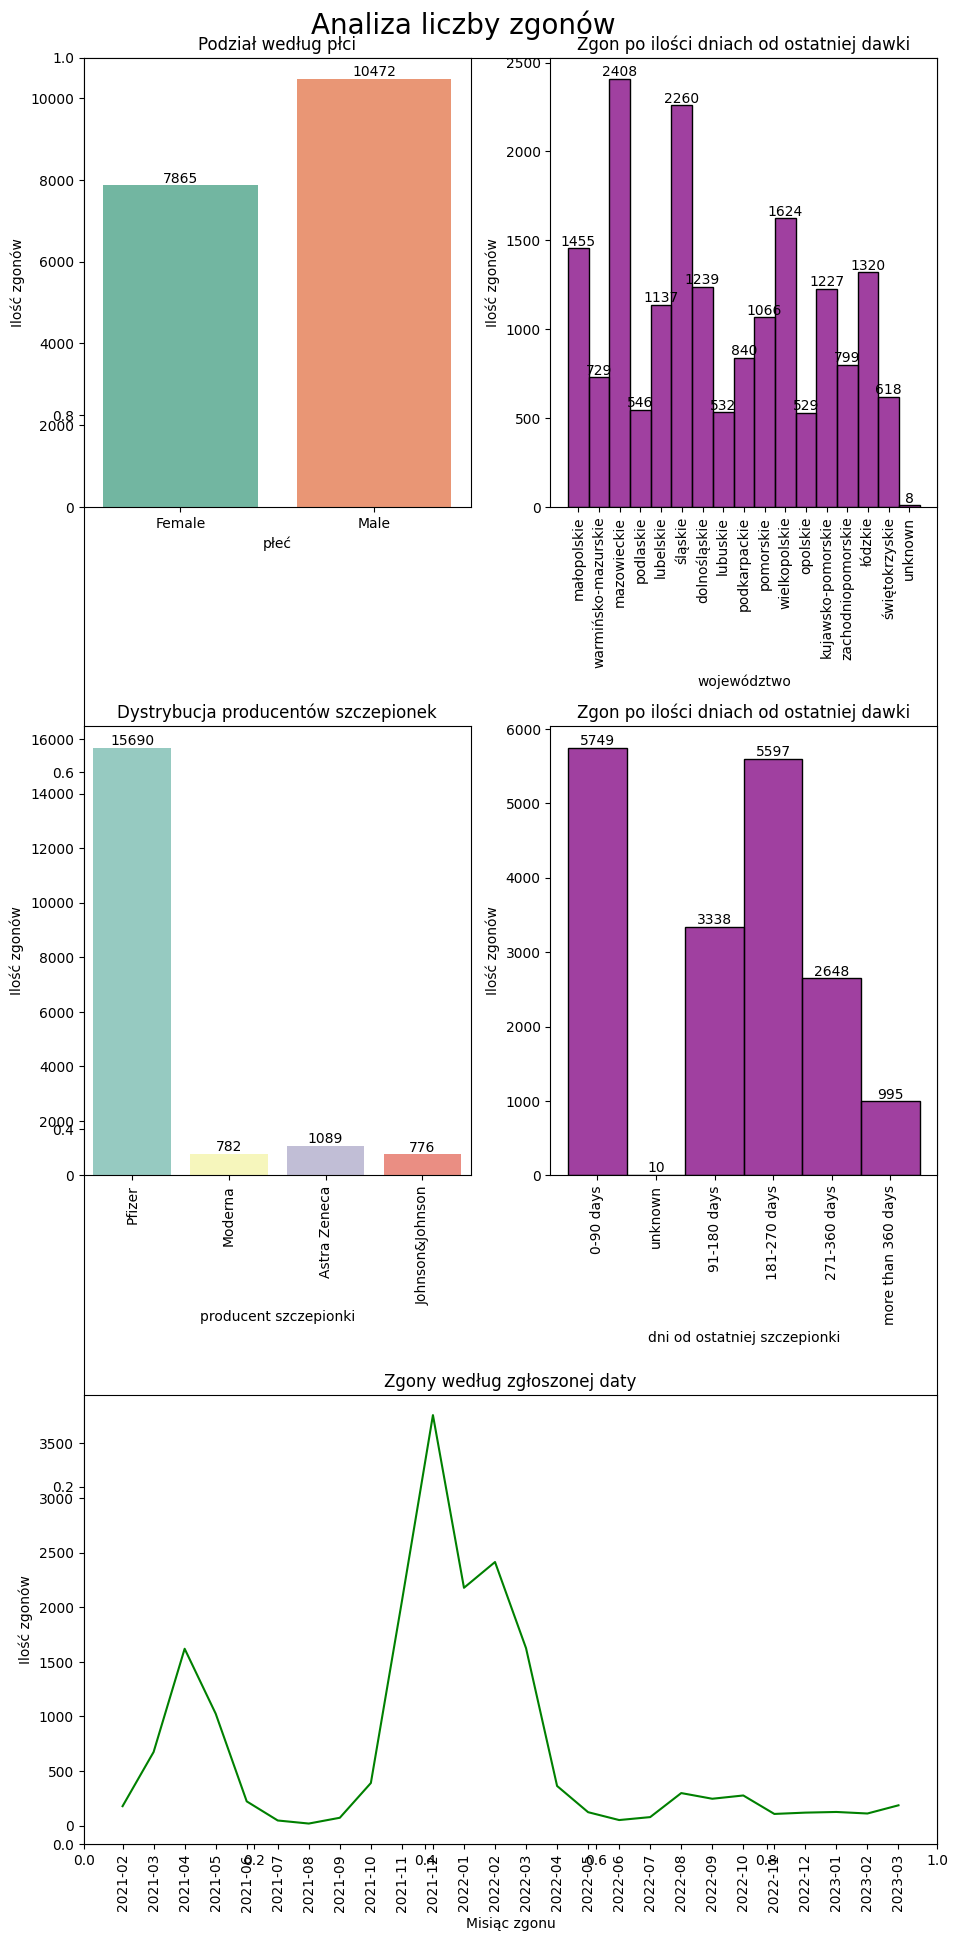

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(10,20), constrained_layout=True, frameon=False) 
axs = fig.subplot_mosaic([["gender", "province"], \
                          ["vaccine_manufacturer", "days_since_last_dose"], \
                          ['date_reported_death', "date_reported_death"]])

plt.suptitle("Analiza liczby zgonów", size=20)

sns.countplot(x="gender", data=data, ax=axs['gender'], palette="Set2")
axs['gender'].set(title="Podział według płci", ylabel='Ilość zgonów', xlabel='płeć')
for patch in axs['gender'].patches:
    axs['gender'].text(patch.get_x() + patch.get_width() / 2, patch.get_height(), 
                     int(patch.get_height()), ha='center', va='bottom')

sns.histplot(x="province", data=data, bins=30, ax=axs["province"], color="purple")
axs["province"].set(title="Zgon po ilości dniach od ostatniej dawki", ylabel='Ilość zgonów', xlabel='województwo')
for tick in axs["province"].get_xticklabels():
    tick.set_rotation(90)
for patch in axs["province"].patches:
    axs["province"].text(patch.get_x() + patch.get_width() / 2, patch.get_height(), 
                     int(patch.get_height()), ha='center', va='bottom')

sns.countplot(x="vaccine_manufacturer", data=data, ax=axs['vaccine_manufacturer'], palette="Set3")
axs['vaccine_manufacturer'].set(title="Dystrybucja producentów szczepionek", ylabel='Ilość zgonów', \
                                xlabel='producent szczepionki')
for tick in axs["vaccine_manufacturer"].get_xticklabels():
    tick.set_rotation(90)
for patch in axs['vaccine_manufacturer'].patches:
    axs['vaccine_manufacturer'].text(patch.get_x() + patch.get_width() / 2, patch.get_height(), 
                     int(patch.get_height()), ha='center', va='bottom')
    
sns.histplot(x="days_since_last_dose", data=data, bins=30, ax=axs['days_since_last_dose'], color="purple")
axs['days_since_last_dose'].set(title="Zgon po ilości dniach od ostatniej dawki", ylabel='Ilość zgonów', \
                                xlabel='dni od ostatniej szczepionki')
for tick in axs['days_since_last_dose'].get_xticklabels():
    tick.set_rotation(90)
for patch in axs['days_since_last_dose'].patches:
    axs['days_since_last_dose'].text(patch.get_x() + patch.get_width() / 2, patch.get_height(), 
                     int(patch.get_height()), ha='center', va='bottom')



sns.lineplot(x="date_reported_death", y="deaths_number", data=grouped_data_by_month, ax=axs['date_reported_death'], color="green")
axs['date_reported_death'].set(title="Zgony według zgłoszonej daty", ylabel='Ilość zgonów', xlabel='Misiąc zgonu')
for tick in axs['date_reported_death'].get_xticklabels():
    tick.set_rotation(90)
    

plt.tight_layout()
plt.show()


W powyższych wykresach zostały użyte konkretne techniki w celu odpowiedniego przedstawienia informacji.<br>
- W pierwszym wykresie został użyty countplot do przedstawienia rozkładu płci, ponieważ jest to zmienna kategoryczna. Dodatkowo, zostały dodane liczby na każdym słupku, aby umożliwić łatwe odczytanie liczby osób w każdej kategorii.
- W drugim wykresie został użyty histplot do przedstawienia zależności między województwami, a liczbą zgonów, aby zobaczyć jak liczba zgonów zmieniała się w danym województwie.
- W trzecim wykresie został również użyty countplot, aby przedstawić dystrybucję producentów szczepionek, które są zmienną kategoryczną.
- W czwartym wykresie został użyty histplot do przedstawienia rozkładu zmiennej ciągłej - liczby dni między ostatnią dawką a zgonem. 
- W ostatnim wykresie został użyty lineplot do przedstawienia zależności między datą zgłoszenia zgonu a liczbą zgonów, aby zobaczyć jak liczba zgonów zmieniała się w czasie.

## Punkt 5
Dla zbioru danych (data - COVID-19), zmienna **"deaths_number"** byłaby dobrą zmienną TARGET dla uczenia nadzorowanego.<br>
Jest to zmienna, którą chcemy przewidzieć.<br>
Celem modelu uczenia maszynowego w tym przypadku mogłoby być przewidzenie liczby zgonów w oparciu o inne dostępne cechy, takie jak wiek, płeć, choroby współistniejące, producent szczepionki, ostatnia dawka i dni od ostatniej dawki. <br>
Informacje te mogłyby być potencjalnie przydatne dla urzędników zdrowia publicznego do identyfikacji i reagowania na grupy wysokiego ryzyka lub do oceny skuteczności różnych szczepionek lub protokołów leczenia.
## Punkt 6
### Podzbiór zmiennych FEATURES, które wpływają na zmienną TARGET
- province: może wpływać na ryzyko zgonu w zależności od sytuacji epidemicznej w danym regionie oraz jakości opieki zdrowotnej,
- gender: istnieją różnice w ryzyku zgonu między płciami, choćby z powodu różnic w występowaniu chorób współistniejących,
- age_category: ryzyko zgonu wzrasta wraz z wiekiem,
- underlying_conditions: obecność chorób współistniejących może zwiększać ryzyko zgonu
- vaccine_manufacturer: różnice w skuteczności i bezpieczeństwie poszczególnych producentów szczepionek mogą wpłynąć na ryzyko zgonu
- last_dose: czas od ostatniej dawki szczepionki może wpłynąć na skuteczność szczepionki i ryzyko zgonu
- days_since_last_dose: czas od ostatniej dawki szczepionki może wpłynąć na skuteczność szczepionki i ryzyko zgonu